# Example: Solving Helmholtz Equation

$$ (\nabla^2 + k^2)u = b$$

In [28]:
%matplotlib ipympl

In [29]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import scipy as sp

In [30]:
import sys
sys.path.append('../modules')
from helmholtz_equation import sources, pml_conditions

In [31]:
from matplotlib.colors import LinearSegmentedColormap
cmap_source = LinearSegmentedColormap.from_list('source', ['green', 'white', 'purple'])

## 1. Domain

In [32]:
main_domain_shape = (201, 201)
main_domain_extension = (-0.5, 0.5, -0.5, 0.5)
nbl = 100

nx = main_domain_shape[0] + nbl*2
ny = main_domain_shape[1] + nbl*2

lpml = (main_domain_extension[1] - main_domain_extension[0])/(main_domain_shape[0]-1) * nbl

domain_shape = (nx, ny)
domain_extension = tuple(x - lpml if i % 2 == 0 else x + lpml for i, x in enumerate(main_domain_extension))

x_array = np.linspace(domain_extension[0], domain_extension[1], nx)
y_array = np.linspace(domain_extension[2], domain_extension[3], ny)

dx = x_array[1] - x_array[0]
dy = y_array[1] - y_array[0]

nk = nx * ny
points_number = np.arange(nk)

## 2. Parameters

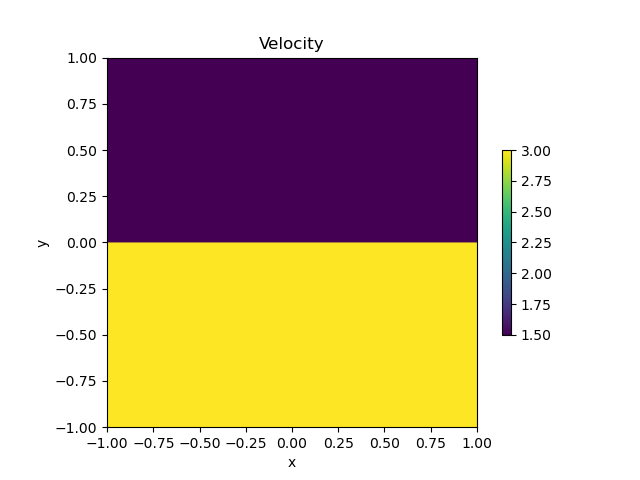

In [33]:
#frequency_array = np.linspace(1, 20, 5)
#frequency_array = np.array([10])
frequency_array = np.array([5, 10, 15, 20, 25])

nfrequencies = np.size(frequency_array)

alpha = 1.4

velocity = 1.5
velocity_array = np.ones((nx, ny))*velocity
velocity_array[:, :(ny-1)//2] = velocity*2

fig2 = plt.figure()
plt.imshow(velocity_array.T, extent=domain_extension, origin='lower', cmap='viridis')
plt.colorbar(shrink=0.5)
plt.title('Velocity')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Source

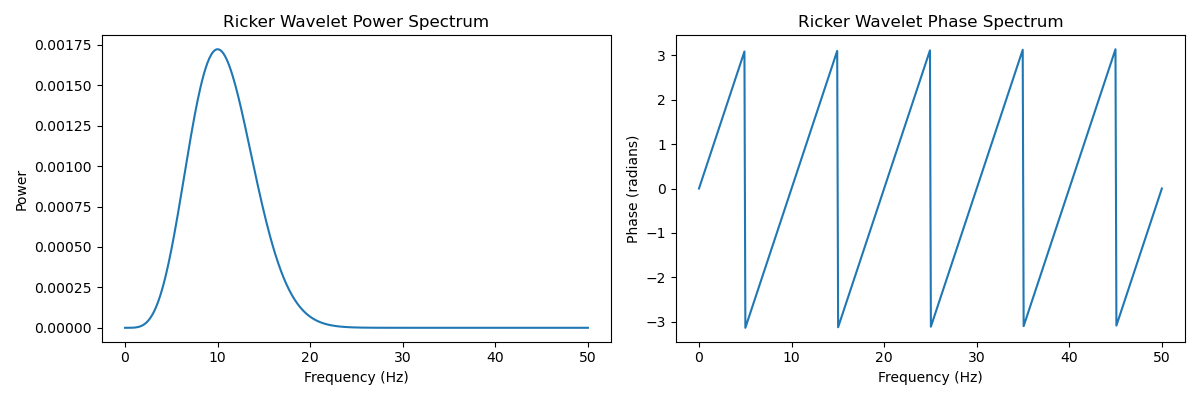

In [34]:
#source = sources.GaussianSource(amplitude=1e2, x_pos=0, y_pos=0.4, sigma=0.01, phase=np.pi/8)
source = sources.RickerWaveletFD(f=10, f0=10, t0=0.1, amplitude=1e2, x_pos=0, y_pos=0.4, sigma=0.01)
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(12, 4))
source.plot((ax, ax2), np.linspace(0, 50, 500))
fig.tight_layout()
plt.show()

## 3. Solver

In [35]:
u_arrays = np.zeros((nx, ny, nfrequencies), dtype=complex)
b_arrays = np.zeros((nx, ny, nfrequencies), dtype=complex)

In [36]:
for i, this_frequency in enumerate(frequency_array):
    source = sources.RickerWaveletFD(f=this_frequency, f0=10, t0=0.1, amplitude=1e2, x_pos=0, y_pos=0.4, sigma=0.01)
    u_arrays[..., i], b_arrays[..., i] = pml_conditions.helmholtz_pml_solution(nx, ny, x_array, y_array, dx, dy, points_number, nk, this_frequency,
                                                nbl, velocity_array, lpml, source, alpha)

Se soluciona el campo en cartesianas
Se soluciona el campo en cartesianas
Se soluciona el campo en cartesianas
Se soluciona el campo en cartesianas
Se soluciona el campo en cartesianas


## 4. Plotting

In [49]:
this_nfrequency = 1
u = u_arrays[..., this_nfrequency]
b = b_arrays[..., this_nfrequency]

C:\Users\jasolanoz\AppData\Local\Temp\ipykernel_13736\400414474.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 4))


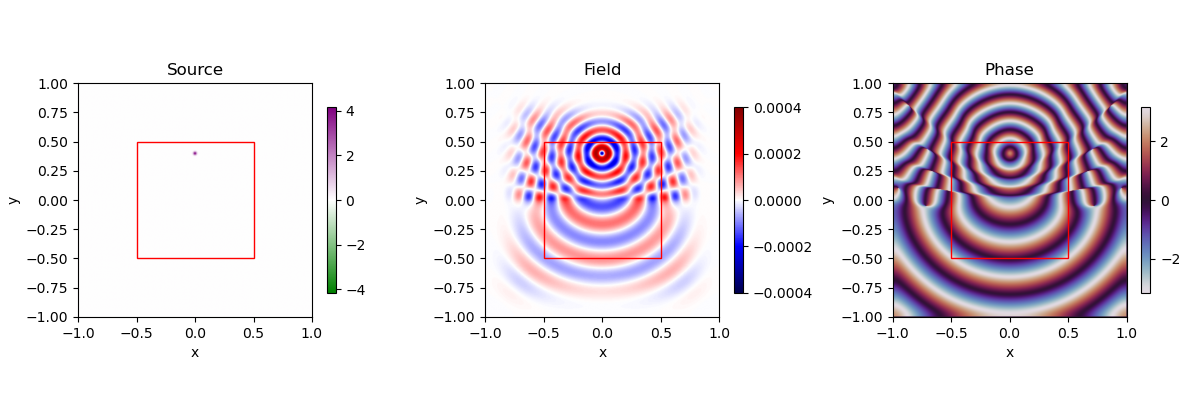

In [50]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 4))
rect_params = dict(
    xy=(main_domain_extension[0], main_domain_extension[2]), 
    width=main_domain_extension[1]-main_domain_extension[0], 
    height=main_domain_extension[3]-main_domain_extension[2], 
    linewidth=1, edgecolor='r', facecolor='none')

vmax = np.max(np.abs(b))
im0 = ax0.imshow(np.real(b).T, extent=domain_extension, origin='lower', cmap=cmap_source, vmin=-vmax, vmax=vmax)
fig.colorbar(im0, ax=ax0, shrink=0.5)
ax0.add_patch(patches.Rectangle(**rect_params))
ax0.set_title('Source')
ax0.set_xlabel('x')
ax0.set_ylabel('y')

#vmax = np.max(np.abs(np.real(u)))
vmax = 4e-4
im1 = ax1.imshow(np.real(u).T, extent=domain_extension, origin='lower', cmap='seismic', vmin=-vmax, vmax=vmax)
fig.colorbar(im1, ax=ax1, shrink=0.5)
ax1.add_patch(patches.Rectangle(**rect_params))
ax1.set_title('Field')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

im2 = ax2.imshow(np.angle(u).T, extent=domain_extension, origin='lower', cmap='twilight', vmin=-np.pi, vmax=np.pi)
fig.colorbar(im2, ax=ax2, shrink=0.5)
ax2.add_patch(patches.Rectangle(**rect_params))
ax2.set_title('Phase')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

fig.tight_layout()

plt.show()

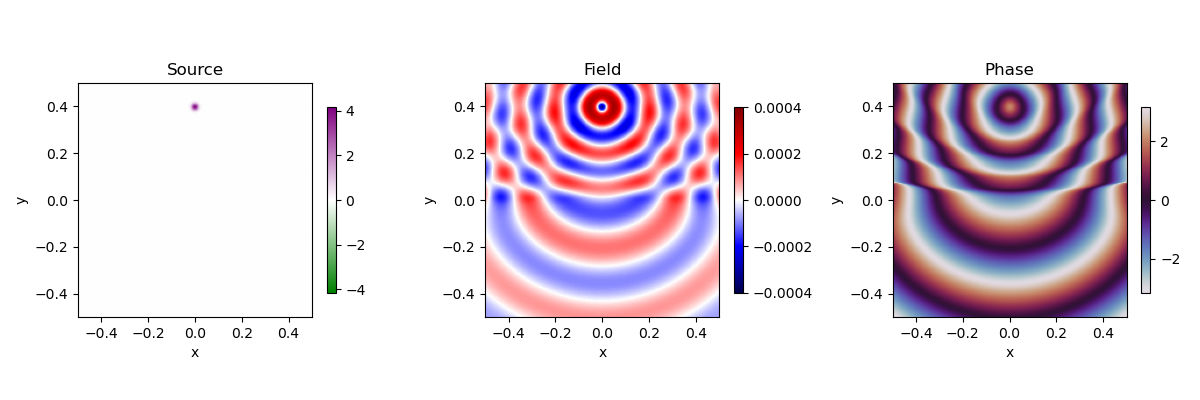

In [51]:
idx_main_domain = (slice(nbl, -nbl), slice(nbl, -nbl))

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 4))

vmax = np.max(np.abs(b))
im0 = ax0.imshow(np.real(b)[idx_main_domain].T, extent=main_domain_extension, origin='lower', cmap=cmap_source, vmin=-vmax, vmax=vmax)
fig.colorbar(im0, ax=ax0, shrink=0.5)
ax0.set_title('Source')
ax0.set_xlabel('x')
ax0.set_ylabel('y')

# vmax = np.max(np.abs(np.real(u)))
vmax = 4e-4
im1 = ax1.imshow(np.real(u)[idx_main_domain].T, extent=main_domain_extension, origin='lower', cmap='seismic', vmin=-vmax, vmax=vmax)
fig.colorbar(im1, ax=ax1, shrink=0.5)
ax1.set_title('Field')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

im2 = ax2.imshow(np.angle(u)[idx_main_domain].T, extent=main_domain_extension, origin='lower', cmap='twilight', vmin=-np.pi, vmax=np.pi)
fig.colorbar(im2, ax=ax2, shrink=0.5)
ax2.set_title('Phase')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

fig.tight_layout()

plt.show()